In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [2]:

input_transform=transforms.Compose([transforms.ToTensor()])

mnist_trainset = datasets.MNIST(root='./data',train=True,download=True,transform=input_transform)
print(mnist_trainset)


mnist_testset = datasets.MNIST(root='./data',train=False,download=True,transform=input_transform)


max_mnist_size = 2000
mnist_trainset_reduced = torch.utils.data.random_split(mnist_trainset, [max_mnist_size, len(mnist_trainset)-max_mnist_size])[0]

100%|██████████| 9.91M/9.91M [00:00<00:00, 22.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 580kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.66MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.07MB/s]

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [3]:

X_train = torch.unsqueeze(mnist_trainset.data,axis=1)[mnist_trainset_reduced.indices]/255.0
Y_train = mnist_trainset.targets[mnist_trainset_reduced.indices]
X_test = torch.unsqueeze(mnist_testset.data,axis=1)/255.0
Y_test = mnist_testset.targets

In [4]:



mnist_list = [ '0', '1','2','3','4','5','6','7','8','9']

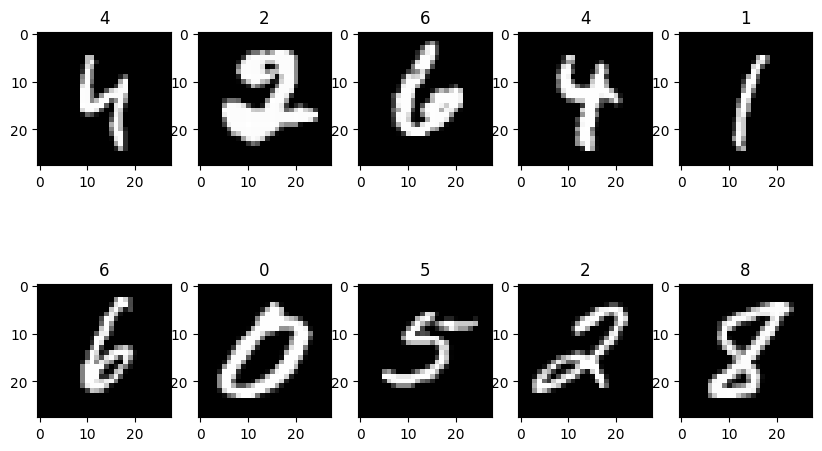

In [5]:
plt.figure(figsize=(10, 6))
for idx in range(0,10):
    plt.subplot(2, 5, idx+1)
    rand_ind = np.random.randint(0,mnist_trainset.data.shape[0])
    plt.imshow(mnist_trainset.data[rand_ind,:,:],cmap='gray')
    plt.title(mnist_list[int(mnist_trainset.targets[rand_ind])])

In [7]:
learning_rate = 0.01
n_epochs = 10
batch_size = 64
nb_classes = int(mnist_trainset.targets.max()+1)

nb_filters = 32
kernel_size = (3, 3)
pool_size = (2, 2)


n_h_0 = 1
n_h_1 = nb_filters
n_h_2 = nb_filters

In [8]:

mnist_model = torch.nn.Sequential(torch.nn.Conv2d(n_h_0,n_h_1,kernel_size,stride=1,bias=True,padding='same'),torch.nn.ReLU(),torch.nn.Conv2d(n_h_1,n_h_2,kernel_size,stride=1,bias=True,padding_mode='zeros'),torch.nn.ReLU(),torch.nn.MaxPool2d(2,2),torch.nn.Flatten(),torch.nn.Linear(5408,10))

mnist_train_loader = torch.utils.data.DataLoader(mnist_trainset_reduced, batch_size=batch_size, shuffle=True)

criterion =torch.nn.CrossEntropyLoss(reduction='sum')
optimizer =torch.optim.Adam(mnist_model.parameters(), lr=learning_rate)


In [9]:
def vector_to_class(x):

  softmax = torch.nn.Softmax(dim=-1)
  probs = softmax(x)


  y = torch.argmax(probs, dim=-1)


  return y


def cnn_accuracy(predict,labels):

  correct = (predict == labels).sum().item()
  total = len(labels)
  accuracy = correct / total

  return accuracy

In [10]:
train_losses=[]
valid_losses=[]

for epoch in range(0,n_epochs):
  train_loss=0.0
  all_labels = []
  all_predicted = []

  for batch_idx, (imgs, labels) in enumerate(mnist_train_loader):

    predict =vector_to_class(mnist_model(imgs))

    loss = criterion(mnist_model(imgs),labels)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    train_loss += loss.item()

    all_labels.extend(labels.tolist())

    all_predicted.extend(predict.tolist())

  print('Epoch:{} Train Loss:{:.4f}'.format(epoch,train_loss/len(mnist_train_loader.dataset)))


  print('Accuracy:{:.4f}'.format(cnn_accuracy(np.array(all_predicted),np.array(all_labels))))

Epoch:0 Train Loss:1.2805
Accuracy:0.6285
Epoch:1 Train Loss:0.3493
Accuracy:0.9000
Epoch:2 Train Loss:0.2133
Accuracy:0.9395
Epoch:3 Train Loss:0.1474
Accuracy:0.9585
Epoch:4 Train Loss:0.0934
Accuracy:0.9660
Epoch:5 Train Loss:0.0741
Accuracy:0.9750
Epoch:6 Train Loss:0.0650
Accuracy:0.9785
Epoch:7 Train Loss:0.0402
Accuracy:0.9870
Epoch:8 Train Loss:0.0395
Accuracy:0.9865
Epoch:9 Train Loss:0.0188
Accuracy:0.9945


In [13]:
predict_train = vector_to_class(mnist_model(X_train))
predict_test =vector_to_class(mnist_model(X_test))

train_accuracy = cnn_accuracy(predict_train, Y_train)
test_accuracy = cnn_accuracy(predict_test, Y_test)



print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9965
Test Accuracy: 0.9299


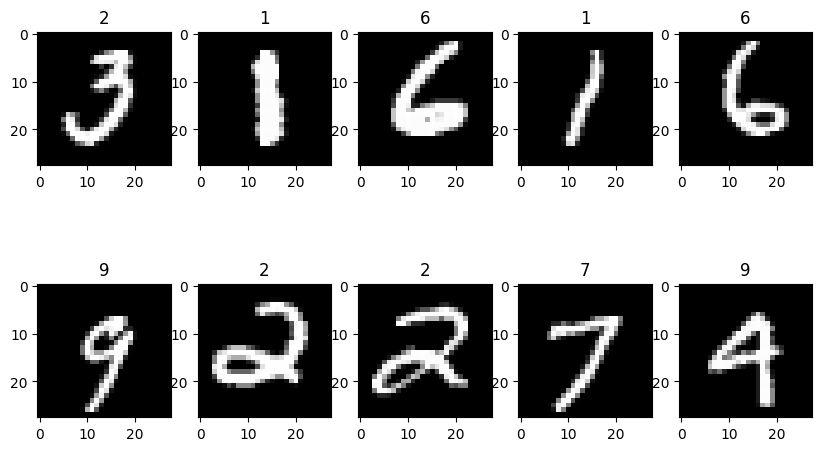

In [12]:
plt.figure(figsize=(10, 6))
for idx in range(0,10):
    plt.subplot(2, 5, idx+1)
    rand_ind = np.random.randint(0,X_test.shape[0])
    test_img = torch.unsqueeze(X_test[rand_ind,:,:,:],axis=1)
    predicted_class = vector_to_class(mnist_model(test_img))
    plt.imshow(test_img.squeeze(),cmap='gray')
    plt.title(mnist_list[int(predicted_class)])